In [31]:
import scipy
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd 
import seaborn
import numpy as np

In [32]:
data = pd.read_csv("in.csv")
data.head()

,x,y,y'
0,0.00,1.000000,-1.00000
1,0.15,0.838771,-1.14944
2,0.30,0.655336,-1.29552
3,0.45,0.450447,-1.43497
4,0.60,0.225336,-1.56464


In [33]:
x = data['x'].values
y = data['y'].values
yDer = data["y'"].values
print(x, y, yDer)

[0.   0.15 0.3  0.45 0.6  0.75 0.9  1.05] [ 1.        0.838771  0.655336  0.450447  0.225336 -0.01831  -0.27839
 -0.55243 ] [-1.      -1.14944 -1.29552 -1.43497 -1.56464 -1.68164 -1.78333 -1.86742]


In [34]:
xMean = 0.525

In [56]:
def getDivededDiff(x, y, n):
    coef = np.zeros([n, n])
    coef[:,0] = y
    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i + 1][j - 1] - coef[i][j - 1]) / (x[i + j] - x[i])
    return coef

In [57]:
def getNewtonPoly(coef, x, xMean, n):
    yx = coef[0]
    p = xMean - x[0]
    for i in range(1, n):
        yx += coef[i] * p
        p *= xMean - x[i]
    return yx


In [58]:
def getSortedArr(arr, n):
    newArr = np.zeros(n)
    k = -1
    for i in range(n):
        newArr[i] = arr[4 + i * k]
        k *= -1
    return newArr

In [66]:
n = 2
xCopy = x[3], x[4]
yCopy = y[3], y[4]
coef = getDivededDiff(xCopy, yCopy, n)[0, :]
yData = getNewtonPoly(coef, xCopy, xMean, n)
yNewton = np.zeros(5)
print(yData)
yNewton[0] = yData

0.33789149999999996


In [67]:
n = 3
xCopy = x[3], x[4], x[5]
yCopy = y[3], y[4], y[5]
coef = getDivededDiff(xCopy, yCopy, n)[0, :]
yData = getNewtonPoly(coef, xCopy, xMean, n)
print(yData)
yNewton[1] = yData

0.34020837499999995


In [68]:
n = 4
xCopy = x[2], x[3], x[4], x[5]
yCopy = y[2], y[3], y[4], y[5]
coef = getDivededDiff(xCopy, yCopy, n)[0, :]
yData = getNewtonPoly(coef, xCopy, xMean, n)
print(yData)
yNewton[2] = yData

0.3403138125


In [69]:
n = 5
xCopy = x[2], x[3], x[4], x[5], x[6]
yCopy = y[2], y[3], y[4], y[5], y[6]
coef = getDivededDiff(xCopy, yCopy, n)[0, :]
yData = getNewtonPoly(coef, xCopy, xMean, n)
print(yData)
yNewton[3] = yData

0.34032351562499996


In [71]:
n = 6
xCopy = x[1], x[2], x[3], x[4], x[5], x[6]
yCopy = y[1], y[2], y[3], y[4], y[5], y[6]
coef = getDivededDiff(xCopy, yCopy, n)[0, :]
yData = getNewtonPoly(coef, xCopy, xMean, n)
print(yData)
yNewton[4] = yData

0.34032399609375


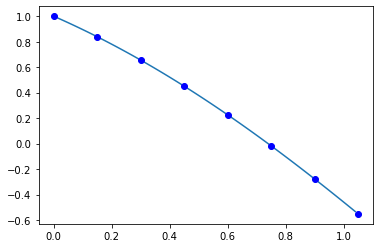

In [82]:
n = 8
xGraph = np.arange(x[0], x[7], 0.01)
yGraph = np.zeros(xGraph.size)
for i in range(xGraph.size):
    coef = getDivededDiff(x, y, n)[0, :]
    yGraph[i] = getNewtonPoly(coef, x, xGraph[i], n)
plt.plot(xGraph, yGraph)
plt.plot(x, y, 'bo')

In [83]:
def dl(i, xi):
	result = 0.0
	for j in range(0,len(xi)):
		if j!=i:
			result += 1/(xi[i]-xi[j])
	result *= 2
	return result

In [85]:
def l(i, xi, x):
    deno = 1.0
    nu = 1.0

    for j in range(0, len(xi)):
        if j!= i:
            deno *= (xi[i]-xi[j])
            nu *= (x-xi[j])

    return nu/deno


In [88]:
def get_Hermite(xi, yi, dyi):
    def he(x):
        result = 0.0
        for i in range(0, len(xi)):
            result += (yi[i]+(x-xi[i])*(dyi[i]-2*yi[i]*dl(i, xi))) * ((l(i,xi,x))**2)
        return result
    return he